In [55]:
import pandas as pd
from math import pi, exp
from numpy import exp, sqrt
import matplotlib.pyplot as plt 

In [13]:
columns = ['asia','tub','smoke','lung','bronc','either','xray','dysp']
features = ["has_visited_asia", "has_tuberculosis", "smoking", "has_lung_cancer", "has_bronchitis", "either_tuberculosis_or_cancer", "xray_result", "dyspnea"]
data = pd.read_csv("data/ASIA10k.csv", names=features, header=1)

In [2]:
from scipy.stats import norm

In [52]:
data = pd.read_csv("data/iris.data", header=0)

In [67]:
data.dtypes

sepal_length_in_cm    float64
sepal_width_in_cm     float64
petal_length_in_cm    float64
petal_width_in_cm     float64
class                  object
dtype: object

In [5]:
def gaussian_distribution(x, mean, std):
    return (1/(sqrt(2*pi)))*exp(-(x-mean)**2/(2*std**2)) 

In [74]:
data["petal_width_in_cm"].hist()

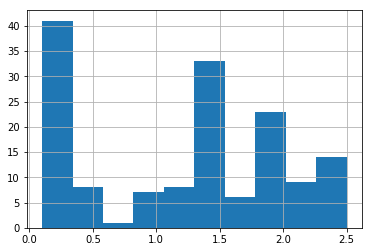

In [75]:
plt.show()

In [84]:
std = data.groupby("class")["petal_width_in_cm"].std().reset_index(name="petal_width_in_cm_std")
data = pd.merge(data, std, left_on="class", right_on="class")

In [85]:
mean = data.groupby("class")["petal_width_in_cm"].mean().reset_index(name="petal_width_in_cm_mean")
data = pd.merge(data, mean, left_on="class", right_on="class")

In [86]:
data["petal_width_in_cm|class"]=norm.pdf(data["petal_width_in_cm"], loc=data["petal_width_in_cm_mean"], scale=data["petal_width_in_cm_std"])
data.drop(["petal_width_in_cm_mean", "petal_width_in_cm_std"], axis=1, inplace=True)

In [87]:
data["petal_width_in_cm|class"].std()

1.0299326810758798

In [88]:
data["petal_width_in_cm|class"].hist()

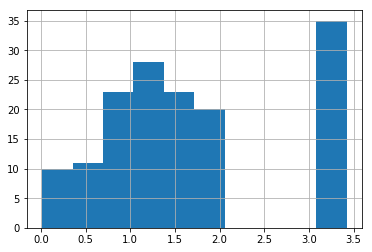

In [89]:
plt.show()

In [201]:
std = data.groupby("class")["petal_length_in_cm"].std().reset_index(name="petal_length_in_cm_std")
data = pd.merge(data, std, left_on="class", right_on="class")
mean = data.groupby("class")["petal_length_in_cm"].mean().reset_index(name="petal_length_in_cm_mean")
data = pd.merge(data, mean, left_on="class", right_on="class")

In [202]:
data["petal_length_in_cm|class"]=gaussian_distribution(data["petal_length_in_cm"], data["petal_length_in_cm_mean"], data["petal_length_in_cm_std"])
data.drop(["petal_length_in_cm_mean", "petal_length_in_cm_std"], axis=1, inplace=True)

In [203]:
std = data.groupby("class")["sepal_width_in_cm"].std().reset_index(name="sepal_width_in_cm_std")
data = pd.merge(data, std, left_on="class", right_on="class")
mean = data.groupby("class")["sepal_width_in_cm"].mean().reset_index(name="sepal_width_in_cm_mean")
data = pd.merge(data, mean, left_on="class", right_on="class")

In [204]:
data["sepal_width_in_cm|class"]=gaussian_distribution(data["sepal_width_in_cm"], data["sepal_width_in_cm_mean"], data["sepal_width_in_cm_std"])
data.drop(["sepal_width_in_cm_mean", "sepal_width_in_cm_std"], axis=1, inplace=True)

In [205]:
std = data.groupby("class")["sepal_length_in_cm"].std().reset_index(name="sepal_length_in_cm_std")
data = pd.merge(data, std, left_on="class", right_on="class")
mean = data.groupby("class")["sepal_length_in_cm"].mean().reset_index(name="sepal_length_in_cm_mean")
data = pd.merge(data, mean, left_on="class", right_on="class")

In [206]:
data["sepal_length_in_cm|class"]=gaussian_distribution(data["sepal_length_in_cm"], data["sepal_length_in_cm_mean"], data["sepal_length_in_cm_std"])
data.drop(["sepal_length_in_cm_mean", "sepal_length_in_cm_std"], axis=1, inplace=True)

In [207]:
data["sepal_length_in_cm|class"]*data["sepal_width_in_cm|class"]*data["petal_length_in_cm|class"]*data["petal_width_in_cm|class"]

0      0.020513
1      0.011391
2      0.008676
3      0.008287
4      0.019405
         ...   
145    0.012332
146    0.004237
147    0.020314
148    0.005144
149    0.007167
Length: 150, dtype: float64

In [193]:
norm.pdf(data[data["class"] == "Iris-setosa"]["petal_width_in_cm|class"], 
         loc=data[data["class"] == "Iris-setosa"]["petal_width_in_cm|class"].mean(),
        scale=data[data["class"] == "Iris-setosa"]["petal_width_in_cm|class"].std())

array([0.31007241, 0.31007241, 0.31007241, 0.31007241, 0.31007241,
       0.14513573, 0.3417365 , 0.31007241, 0.31007241, 0.19083702,
       0.31007241, 0.31007241, 0.19083702, 0.19083702, 0.31007241,
       0.14513573, 0.14513573, 0.3417365 , 0.3417365 , 0.3417365 ,
       0.31007241, 0.14513573, 0.31007241, 0.01968624, 0.31007241,
       0.31007241, 0.14513573, 0.31007241, 0.31007241, 0.31007241,
       0.31007241, 0.14513573, 0.19083702, 0.31007241, 0.19083702,
       0.31007241, 0.31007241, 0.19083702, 0.31007241, 0.31007241,
       0.3417365 , 0.3417365 , 0.31007241, 0.01204934, 0.14513573,
       0.3417365 , 0.31007241, 0.31007241, 0.31007241, 0.31007241])